Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

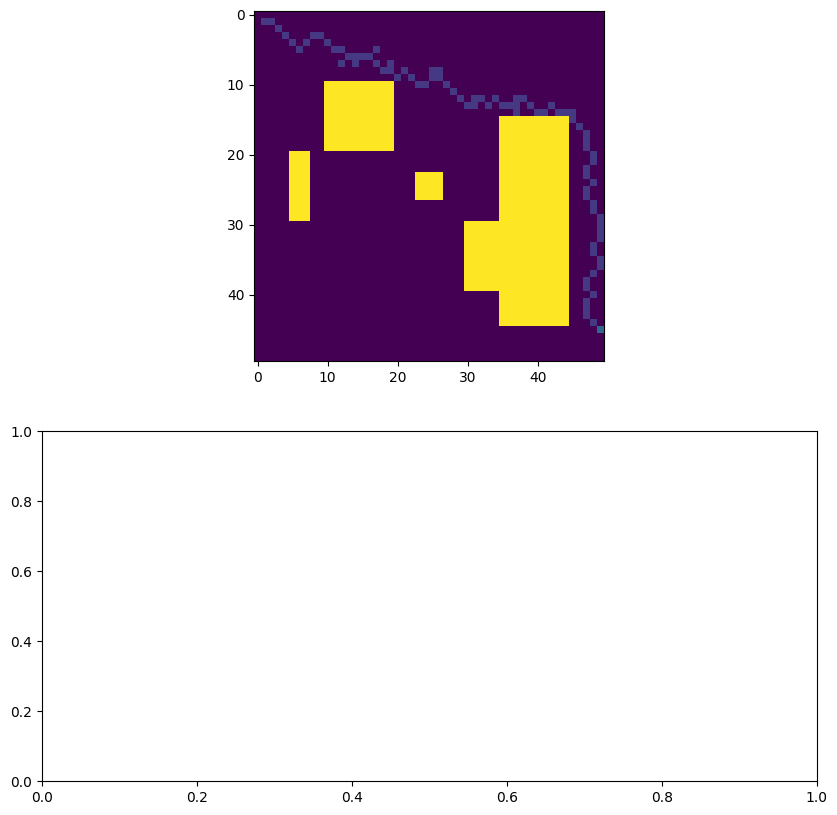

>0, new best f([1, 6, 5, 4, 4, 2, 0, 5, 2, 7, 1, 1, 3, 8, 7, 8, 8, 8, 0, 2, 1, 3, 0, 5, 1, 7, 2, 3, 6, 7, 7, 6, 8, 6, 6, 1, 7, 4, 6, 1, 5, 7, 2, 5, 5, 1, 1, 1, 1, 7, 7, 8, 5, 5, 5, 2, 7, 4, 0, 2, 7, 4, 4, 5, 5, 7, 3, 3, 6, 4, 5, 7, 5, 5, 6, 3, 8, 0, 8, 0, 2, 5, 8, 5, 2, 7, 1, 2, 0, 4, 7, 4, 2, 7, 4, 8, 7, 0, 6, 8, 3, 5, 1, 3, 8, 2, 1, 2, 1, 8, 4, 2, 3, 0, 6, 4, 2, 5, 3, 2]) = 25940.000
>0, new best f([7, 3, 5, 1, 2, 0, 7, 7, 7, 2, 1, 4, 2, 7, 5, 7, 1, 3, 0, 0, 4, 6, 8, 4, 7, 0, 0, 7, 4, 1, 4, 2, 7, 6, 5, 6, 4, 3, 1, 7, 5, 0, 2, 4, 8, 0, 7, 0, 2, 5, 6, 1, 1, 0, 4, 8, 5, 3, 8, 3, 6, 0, 0, 2, 2, 5, 0, 1, 8, 3, 2, 4, 4, 6, 5, 8, 8, 4, 7, 7, 2, 3, 2, 7, 4, 7, 2, 4, 7, 7, 5, 7, 8, 6, 4, 6, 5, 1, 4, 6, 4, 0, 6, 4, 2, 7, 2, 0, 6, 0, 0, 4, 6, 0, 0, 8, 2, 3, 5, 1]) = 12790.000
>0, new best f([8, 5, 3, 2, 6, 7, 0, 7, 8, 0, 1, 7, 8, 1, 7, 4, 2, 8, 3, 6, 2, 7, 7, 6, 5, 2, 1, 5, 4, 6, 8, 7, 1, 3, 8, 3, 8, 2, 2, 6, 8, 7, 4, 8, 5, 8, 2, 1, 6, 1, 7, 0, 4, 6, 7, 7, 6, 5, 3, 3, 5, 8, 7, 0, 1, 2, 0, 8, 8,

In [68]:
%matplotlib ipympl
from numpy import ceil, floor, log2
from numpy import random
from numpy.random import randint
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
import matplotlib.cm as cm
import matplotlib

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
cmap = matplotlib.colors.ListedColormap(newcolors)
plt.rcParams['figure.figsize'] = [10, 10]

fig,axs = plt.subplots(2)
ax=axs[0]
ax2=axs[1]
hdisplay = display.display("", display_id=True)

# random.seed(10)

max_value = 8
cant_bits = int(floor(log2(max_value))+1)
mutations = []
n_cols=int(50)
n_rows=int(50)

MAX_COSTMAP_ELEMENT_COST = int(150)
DISTANCE_TO_END_COST = int(100)
OUTSIDE_ZONE_COST = int(500)
STEP_COST=(20)

costmap = np.zeros([n_rows,n_cols], dtype=int)
cost_history =[]
start_point = [0,0]
end_point = [n_rows-1,n_cols-1]


for i in range(0,cant_bits):
	value = 1 << i
	mutations.append(value)
    
def create_obstacle_square(i_center,j_center,size):
    i_min= int(i_center-size/2)
    i_max= int(i_center+size/2)
    j_min= int(j_center-size/2)
    j_max= int(j_center+size/2)
    
    if i_min <0:
        i_min=0
    if j_min <0:
        j_min=0
    if i_max>=n_rows:
        i_max=n_rows-1
    if j_max>=n_cols:
        j_max=n_cols-1
        
    for i in range(i_min,i_max):
        for j in range(j_min,j_max):
            costmap[i,j]=MAX_COSTMAP_ELEMENT_COST

def create_obstacle_rect(i_min,j_min,i_max,j_max):

    if i_min <0:
        i_min=0
    if j_min <0:
        j_min=0
    if i_max>=n_rows:
        i_max=n_rows-1
    if j_max>=n_cols:
        j_max=n_cols-1
        
    for i in range(i_min,i_max):
        for j in range(j_min,j_max):
            costmap[i,j]=MAX_COSTMAP_ELEMENT_COST
            
def create_obstacles():
    create_obstacle_square(25,25,4)
    create_obstacle_square(15,15,10)
    create_obstacle_rect(15,35,45,45)
    create_obstacle_square(35,35,10)
    create_obstacle_rect(20,5,30,8)
    create_obstacle_rect(20,5,30,8)
    
def get_next_index(index, order):
	
	step_cost = STEP_COST

	if order == 0:
		index[1]+=1 #go right
	elif order ==1:
		index[1]+=1 #go right
		index[0]-=1 #go up
	elif order==2:
		index[0]-=1 #go up
	elif order==3:
		index[1]-=1 #go left
		index[0]-=1 #go up
	elif order==4:
		index[1]-=1 #go left
	elif order ==5: 
		index[1]-=1 #go left
		index[0]+=1 #go down
	elif order ==6:
		index[0]+=1 #go down
	elif order ==7:
		index[1]+=1 #go right
		index[0]+=1 #go down
	elif order ==8: #stay right there
		step_cost = 0
	else:
		print("error indexing shouldnt be here")
	return index, step_cost

def check_index_inside_costmap(index):
	if index[0] < 0 or index[1] < 0 or index[0] >=n_rows or index[1] >=n_cols:
		return False
	return True 

def get_cost(index):
	return costmap[index[0],index[1]]

def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

def calculate_distance_to_end_cost(index):
	return manhattan(index,end_point) * DISTANCE_TO_END_COST


def calculate_path_distance_to_end_cost(path):
	index = start_point.copy()
	for step in path:
		index, step_cost = get_next_index(index, step)
	cost = calculate_distance_to_end_cost(index)
	return cost,index

def calculate_cost(path):
	index = start_point.copy()
	cost = 0 
	for step in path:
		index, step_cost = get_next_index(index, step)
		if check_index_inside_costmap(index) is False:
			cost += OUTSIDE_ZONE_COST
		else:
			cost+=step_cost
			cost+=get_cost(index)
	cost += calculate_distance_to_end_cost(index)
	return cost

def update_display_path_costmap(display_path_costmap,path):
	index = start_point.copy()
	cost = 0 
	for step in path:
		index, step_cost = get_next_index(index, step)
		if check_index_inside_costmap(index):
			display_path_costmap[index[0],index[1]]=25
	for i in range(0,n_rows):
		for j in range(0, n_cols):
			display_path_costmap[i,j]+=costmap[i,j]
	if index[0]>=0 and index[1]>=0 and index[0]<n_rows and index[1]<n_cols:
		display_path_costmap[index[0],index[1]]+=25
	return display_path_costmap

# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross,max_cross_over_sites):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	crossover_quantity = randint(1,max_cross_over_sites+1)

	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		for j in range(0,crossover_quantity):
			# check for recombination
			pt = randint(1, len(p1)-2)
			# perform crossover
			c1 = p1[:pt] + p2[pt:]
			c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

# mutation operator


def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			a = random.choice(mutations)
			bitstring[i] ^= a
			if bitstring[i] >max_value:
				bitstring[i] -=max_value

# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, elitism_size,max_cross_over_sites,new_blood_iterations, new_blood_size):
	# initial population of random bitstring
	pop = [randint(0, max_value+1, n_bits).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, objective(pop[0])
	new_blood_counter=0    
	# enumerate generations
	for gen in range(n_iter):
		# evaluate all candidates in the population
		scores = [objective(c) for c in pop]
		new_blood_counter +=1
		if new_blood_counter >= new_blood_iterations:
			new_blood_counter = 0
			new_blood = [randint(0, max_value+1, n_bits).tolist() for _ in range(new_blood_size)]
			zipped_lists = zip(scores, pop)
			sorted_pairs = sorted(zipped_lists)
			tuples = zip(*sorted_pairs)
			scores, pop = [ list(tuple) for tuple in  tuples]
			pop=pop[0: (n_pop - new_blood_size)]
			pop.extend(new_blood)            
			print('New blood!!: %d'%len(pop))
		# check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
				cost_history.append(scores[i])
				display_path_costmap = np.zeros([n_rows,n_cols], dtype=int)            
				display_path_costmap = update_display_path_costmap(display_path_costmap,best)   
				ax.imshow(display_path_costmap, interpolation='nearest', cmap=cmap,vmin=0,vmax=150)
				hdisplay.update(fig)

		if elitism_size == 0:
			# select parents
			selected = [selection(pop, scores) for _ in range(n_pop)]
			new_selection = []
		else:
			zipped_lists = zip(scores, pop)
			sorted_pairs = sorted(zipped_lists)
			tuples = zip(*sorted_pairs)
			scores, pop = [ list(tuple) for tuple in  tuples]
			selected = pop[0: elitism_size]
			new_selection = [selection(pop[elitism_size:], scores[elitism_size:]) for _ in range(n_pop-elitism_size)]
			selected.extend(new_selection)

		# create the next generation
		children = list()
		children.extend(new_selection)
		for i in range(elitism_size, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross,max_cross_over_sites):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = children
	return [best, best_eval]

create_obstacles()

# define the total iterations
n_iter = 1500
# path steps
n_steps = 120
# define the population size
n_pop = 150
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1 / float(n_steps)
elitism_size = 0

max_cross_over_sites = 5
new_blood_iterations = 10
new_blood_size = 50
# perform the genetic algorithm search
best, score = genetic_algorithm(calculate_cost, n_steps, n_iter, n_pop, r_cross, r_mut, elitism_size, max_cross_over_sites,new_blood_iterations,new_blood_size)
print('Done!')
print('f(%s) = %f' % (best, score))
final_cost,final_index=calculate_path_distance_to_end_cost(best)
print('distance to end cost: %f'%(final_cost))

print('last coordinates: %d,%d'%(final_index[0],final_index[1]))
print('dont move order count: %d'%(np.array(best) == 0).sum())
print('cost history:')
print(','.join([str(x) for x in cost_history ]))
ax2.plot(cost_history)
